# Support Vector Machines Project 


## The Data
The famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set) was used. 

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.


The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Get the data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
iris = sns.load_dataset('iris')

## Exploratory Data Analysis


In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Pairplot of the data set. Which flower species seems to be the most separable

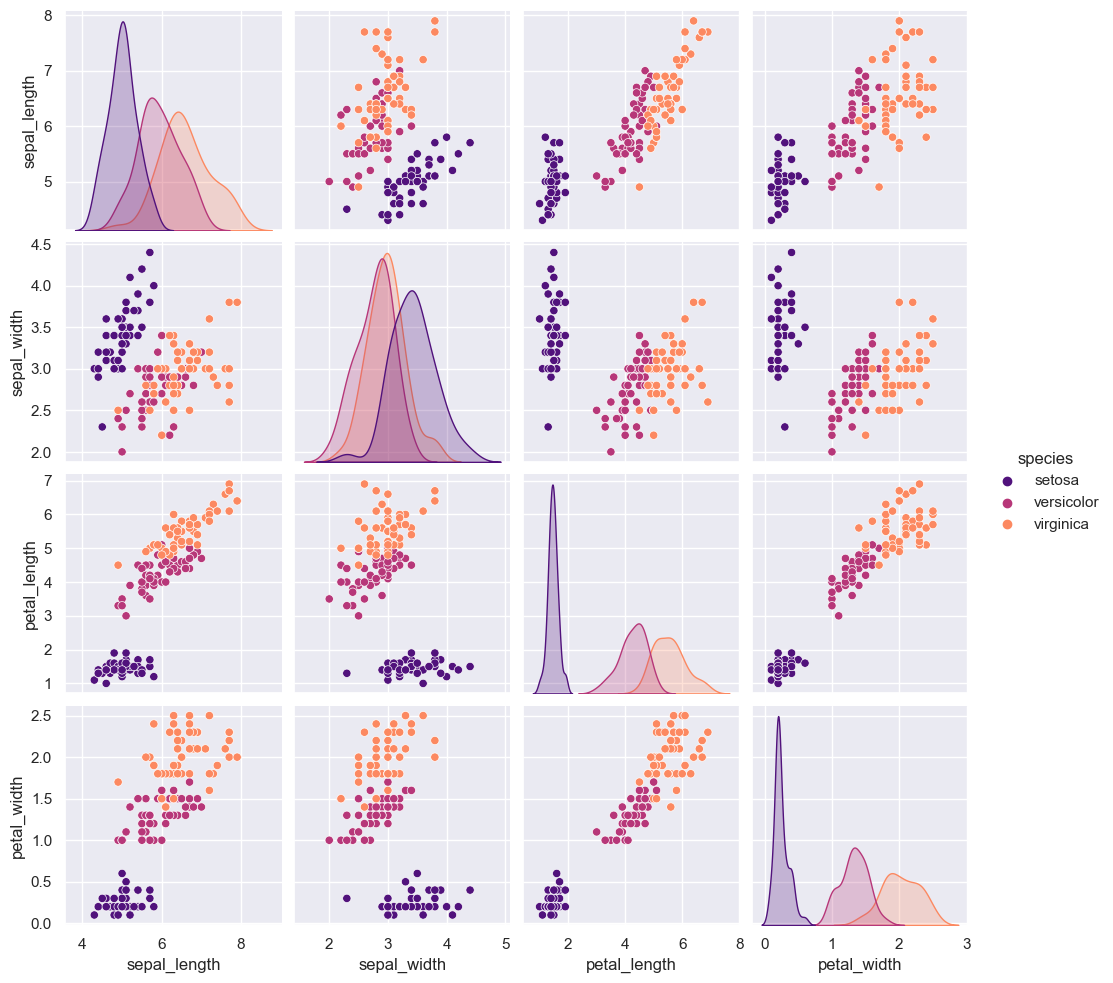

In [6]:
sns.pairplot(iris, hue='species', palette='magma')

Kde plot of sepal_length versus sepal width for setosa species of flower.

C:\Users\shrav\AppData\Local\Temp\ipykernel_5212\112273072.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x='sepal_width',y='sepal_length',data=iris,palette='magma')


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

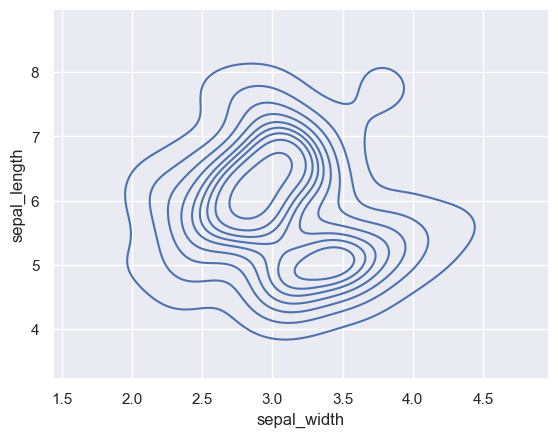

In [7]:
sns.kdeplot(x='sepal_width',y='sepal_length',data=iris,palette='magma')

# Train Test Split


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = iris.drop('species',axis=1)
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train a Model


In [10]:
from sklearn.svm import SVC

In [11]:
model = SVC()

In [12]:
model.fit(X_train,y_train)

SVC()

## Model Evaluation


In [13]:
predictions = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix,classification_report

In [16]:
print(confusion_matrix(y_test,predictions))

[[17  0  0]
 [ 0 12  1]
 [ 0  1 14]]


In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.92      0.92      0.92        13
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



To tune the parameters and try to get even better using GridSearch.

## Gridsearch 

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [22]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.952 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.952 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.905 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.381 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [23]:
prediction = grid.predict(X_test)

In [24]:
print(confusion_matrix(y_test,prediction))

[[17  0  0]
 [ 0 12  1]
 [ 0  1 14]]


In [1]:
print(classification_report(y_test,prediction))

NameError: name 'classification_report' is not defined

**There was no major change in the model's output**